# Notebook containing step-by-step explanation of how Linear Regression with interaction terms was used

### Experiment 1: Creating a 'BaseLine' Simple Lasso Linear Regression Model
### Experiment 2: Creating a Linear Regression with Interaction Terms
### Evaluation

In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

#####  Reading and preprocessing the dataset.

In [2]:
df = pd.read_csv('../../data/final/original_liv_data_per_neighbourhood.csv')
df['moving_out'] = df['Vertrek']
df['moving_in'] = (df['Vestiging'] + df['Verhuizing binnen gridcel'] + df['Verhuizing']) / 3
df['liv'] = df['Livability index']

df.drop(['Livability index', 'Vestiging', 'Vertrek', 'Verhuizing binnen gridcel', 'Verhuizing'], axis=1, inplace=True)
df = pd.get_dummies(df)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df

,green_score,GeregistreerdeOverlast_1,GeregistreerdeMisdrijven_1,moving_out,moving_in,liv,Neighbourhoods_Bavel,Neighbourhoods_Belcrum,Neighbourhoods_Biesdonk,Neighbourhoods_Blauwe_Kei,...,Neighbourhoods_Teteringen,Neighbourhoods_Tuinzigt,Neighbourhoods_Ulvenhout,Neighbourhoods_Valkenberg,Neighbourhoods_Vuchtpolder,Neighbourhoods_Waterdonken,Neighbourhoods_Westerpark,Neighbourhoods_Wisselaar,Neighbourhoods_Ypelaar,Neighbourhoods_Zandberg
0,30.083315,1.855922,375.714286,1.631279,1.152148,7.142857,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.787865,3.912088,323.857143,4.311202,3.595166,6.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.258913,2.930403,379.428571,3.833368,2.131883,2.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,27.485002,1.919414,173.000000,2.553443,2.052703,7.714286,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,29.475880,3.936508,307.571429,3.135380,2.236168,8.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20.694432,8.771673,500.285714,4.826086,3.669730,6.142857,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,36.044948,0.297924,47.714286,1.355232,1.845238,9.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,38.948036,0.219780,39.285714,1.108701,0.803233,8.142857,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,35.736463,0.087912,11.714286,1.285714,0.992064,9.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,43.349977,0.258852,36.000000,1.421608,0.563492,8.857143,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Generating random colors used in the plots. The np.random.seed has been set to create reproducible results.

In [3]:
np.random.seed(42)
colors = []
max_value = 1
min_values = 256
for i in range(0, len(df)):
    r = int(np.random.random() * (max_value - min_values) + min_values)
    g = int(np.random.random() * (max_value - min_values) + min_values)
    b = int(np.random.random() * (max_value - min_values) + min_values)

    colors.append('#%02x%02x%02x' % (r, g, b))
colors[:5]

['#a00d45', '#67d8d8', '#f12366', '#4bfa08', '#2bc9d1']

##### Plotting the data.

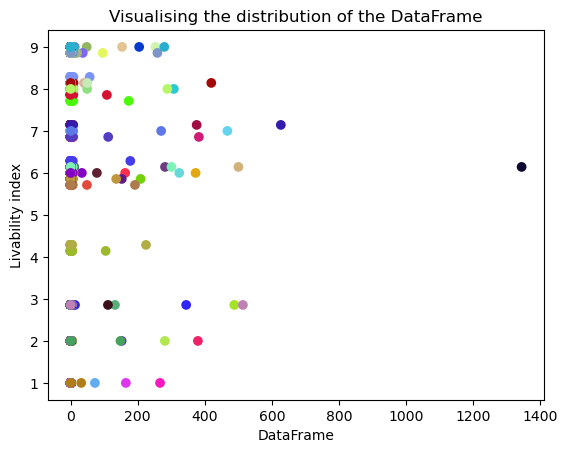

In [4]:
fig, ax = plt.subplots()

for idx, column in enumerate(df.columns[1:-1]):
    ax.scatter(x=column, y='liv', c=colors, data=df)

ax.set_title('Visualising the distribution of the DataFrame')
ax.set_ylabel("Livability index")
ax.set_xlabel('DataFrame')
plt.show()

### Experiment 1: Creating a 'BaseLine' Simple Lasso Linear Regression Model
##### Generating the formula

In [5]:
formula = df.columns[5] + ' ~ '

for idx, column in enumerate(df.columns):
    if idx != 5:
        formula += column + ' + '
formula = formula[:-3]
formula

'liv ~ green_score + GeregistreerdeOverlast_1 + GeregistreerdeMisdrijven_1 + moving_out + moving_in + Neighbourhoods_Bavel + Neighbourhoods_Belcrum + Neighbourhoods_Biesdonk + Neighbourhoods_Blauwe_Kei + Neighbourhoods_Boeimeer + Neighbourhoods_Brabantpark + Neighbourhoods_Buitengebied_Bavel + Neighbourhoods_Buitengebied_Prinsenbeek + Neighbourhoods_Buitengebied_Teteringen + Neighbourhoods_Buitengebied_Ulvenhout + Neighbourhoods_Chassé + Neighbourhoods_City + Neighbourhoods_Doornbos_Linie + Neighbourhoods_Effen_Rith + Neighbourhoods_Emer + Neighbourhoods_Fellenoord + Neighbourhoods_Gageldonk + Neighbourhoods_Geeren_noord + Neighbourhoods_Geeren_zuid + Neighbourhoods_Ginneken + Neighbourhoods_Haagpoort + Neighbourhoods_Hagebeemd + Neighbourhoods_Hazeldonk + Neighbourhoods_Heilaar + Neighbourhoods_Heksenwiel + Neighbourhoods_Heusdenhout + Neighbourhoods_Heuvel + Neighbourhoods_Hoogeind + Neighbourhoods_Kesteren + Neighbourhoods_Kievitsloop + Neighbourhoods_Kroeten + Neighbourhoods_Krogte

##### Training the model

In [50]:
model_1 = sm.OLS(df['liv'], df[df.columns[np.where(df.columns != 'liv')]])
model_1 = model_1.fit_regularized()

##### Visualizing the coefficients. The chart cannot be interpreted because the information is in 3 dimensions.

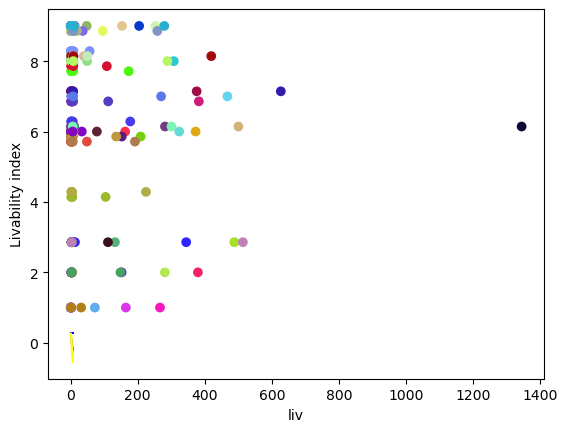

In [48]:
X = np.linspace(1, 6, num=5)
line_colors = ["blue", 'orange', 'green', 'pink', 'yellow']
params = model_1.params

sum = 0
fig, ax = plt.subplots()
for idx, column in enumerate(df.columns[1:len(line_colors) + 1]):
    ax.scatter(x=column, y='liv', c=colors, data=df)
    ax.set_ylabel("Livability index")
    ax.set_xlabel(column)
    intercept = params[0]

    el = params[idx + 1]
    res = (intercept + el) + sum * X
    sum += (abs(el) * -1)
    ax.plot(X, res, line_colors[idx])
plt.show()

### Experiment 2: Training a Linear Regression with Interaction Terms Model
##### Generating the formula

In [8]:
formula = df.columns[5] + ' ~ '

for idx, column in enumerate(df.columns):
    if idx != 5:
        formula += column + ' + '

for idx, column in enumerate(df.columns):
    if idx != 5:
        formula += column + ':'

formula = formula[:-1]
formula

'liv ~ green_score + GeregistreerdeOverlast_1 + GeregistreerdeMisdrijven_1 + moving_out + moving_in + Neighbourhoods_Bavel + Neighbourhoods_Belcrum + Neighbourhoods_Biesdonk + Neighbourhoods_Blauwe_Kei + Neighbourhoods_Boeimeer + Neighbourhoods_Brabantpark + Neighbourhoods_Buitengebied_Bavel + Neighbourhoods_Buitengebied_Prinsenbeek + Neighbourhoods_Buitengebied_Teteringen + Neighbourhoods_Buitengebied_Ulvenhout + Neighbourhoods_Chassé + Neighbourhoods_City + Neighbourhoods_Doornbos_Linie + Neighbourhoods_Effen_Rith + Neighbourhoods_Emer + Neighbourhoods_Fellenoord + Neighbourhoods_Gageldonk + Neighbourhoods_Geeren_noord + Neighbourhoods_Geeren_zuid + Neighbourhoods_Ginneken + Neighbourhoods_Haagpoort + Neighbourhoods_Hagebeemd + Neighbourhoods_Hazeldonk + Neighbourhoods_Heilaar + Neighbourhoods_Heksenwiel + Neighbourhoods_Heusdenhout + Neighbourhoods_Heuvel + Neighbourhoods_Hoogeind + Neighbourhoods_Kesteren + Neighbourhoods_Kievitsloop + Neighbourhoods_Kroeten + Neighbourhoods_Krogte

##### Training the model

In [9]:
model_2 = smf.ols(formula=formula, data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    liv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                nan
Time:                        16:29:53   Log-Likelihood:                 1568.8
No. Observations:                  56   AIC:                            -3026.
Df Residuals:                       0   BIC:                            -2912.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

##### Visualizing the coefficients. The chart cannot be interpreted because the information is in 3 dimensions.

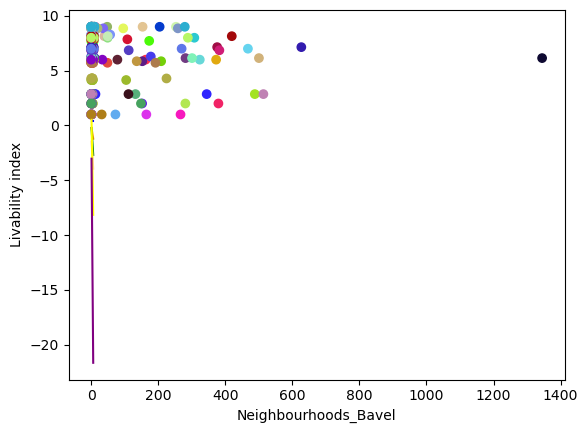

In [10]:
X = np.linspace(1, 6, num=5)
line_colors = ["blue", 'orange', 'green', 'pink', 'yellow', 'purple']
params = model_2.params

sum = 0
fig, ax = plt.subplots()
for idx, column in enumerate(df.columns[1:len(line_colors) + 1]):
    ax.scatter(x=column, y='liv', c=colors, data=df)
    ax.set_ylabel("Livability index")
    ax.set_xlabel(column)
    intercept = params[0]
    el = params[idx + 1]
    res = (intercept + el) + sum * X
    sum += (abs(el) * -1)
    ax.plot(X, res, line_colors[idx])
plt.show()

### Evaluation

In [11]:
model_2.predict(df.iloc[:1])

0    7.142857
dtype: float64